<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
#from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

# Plan

1. Graph Historical Performance
   1. Pull one stocks data
   1. Get stock data over a time period
   1. Graph stock price over time period
1. Get S&P500 company info
1. Get multiple ticker price data
1. Get recent adjusted closing price
1.

# 1. Graph Historical Performance

### 1. Pull one stocks data

In [2]:
meta = yf.Ticker("META")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [3]:
meta.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-01 00:00:00-05:00,143.000000,147.190002,123.019997,131.089996,558786200,0.0,0.0
2019-01-01 00:00:00-05:00,128.990005,171.679993,128.559998,166.690002,527547900,0.0,0.0
2019-02-01 00:00:00-05:00,165.839996,172.470001,159.589996,161.449997,302243200,0.0,0.0
2019-03-01 00:00:00-05:00,162.600006,174.300003,159.279999,166.690002,387936100,0.0,0.0
2019-04-01 00:00:00-04:00,167.830002,198.479996,167.279999,193.399994,381985300,0.0,0.0


### Graph stock data over time period

<Axes: xlabel='Date', ylabel='Close'>

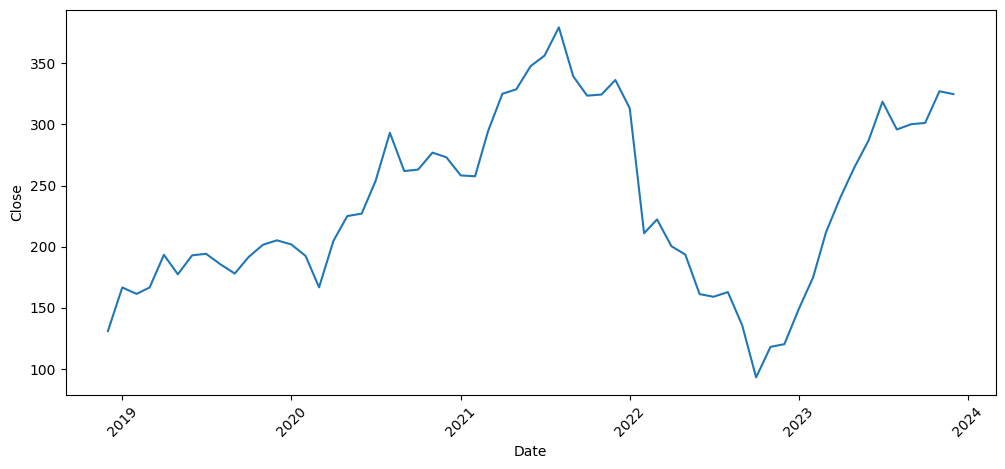

In [5]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= meta.history(period=str_period,
                             interval=str_interval).index,
             y= meta.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax)

In [6]:
meta.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-02 00:00:00-04:00,317.299988,318.820007,308.329987,310.869995,21631800,0.0,0.0
2023-11-03 00:00:00-04:00,312.549988,315.549988,311.019989,314.600006,16754100,0.0,0.0
2023-11-06 00:00:00-05:00,315.980011,318.329987,314.450012,315.799988,12887700,0.0,0.0
2023-11-07 00:00:00-05:00,317.059998,321.000000,315.119995,318.820007,14055600,0.0,0.0
2023-11-08 00:00:00-05:00,318.140015,321.329987,314.880005,319.779999,13609700,0.0,0.0
2023-11-09 00:00:00-05:00,319.420013,324.179993,318.799988,320.549988,16103100,0.0,0.0
2023-11-10 00:00:00-05:00,319.940002,329.100006,319.459991,328.769989,19096200,0.0,0.0
2023-11-13 00:00:00-05:00,326.200012,332.329987,325.700012,329.190002,16908900,0.0,0.0
2023-11-14 00:00:00-05:00,334.540009,338.100006,333.329987,336.309998,17179400,0.0,0.0


# Get S&P 500 stock tickers

In [7]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [8]:
df_sp500_co_info['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

https://www.marketdata.app/how-to-use-the-yahoo-finance-api/

# Get Multiple Ticker Price Data

## Put S&P 500 tickers into a string

In [9]:
# If the below download fails, then it might be because of the replacement of . with -
str_sp500_stk_tkrs= ' '.join(i if '.' not in i else i.replace('.','-') for i in df_sp500_co_info['Symbol'])
print('Number of tickers in sp500:', len(df_sp500_co_info['Symbol']), '\n')
str_sp500_stk_tkrs

Number of tickers in sp500: 503 



'MMM AOS ABT ABBV ACN ADM ADBE ADP AES AFL A ABNB APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY AXON BKR BALL BAC BBWI BAX BDX WRB BRK-B BBY BIO TECH BIIB BLK BX BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF-B BG CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE COR CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DIS DG DLTR D DPZ DOV DOW DTE DUK DD EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY EG EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FITB FSLR FE FIS FI FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GL GPN GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST HWM 

## Query Multiple Tickers on yahoo finance

In [10]:
str_today = datetime.today().strftime("%Y-%m-%d")

In [11]:
data = yf.download(str_sp500_stk_tkrs, start="2018-01-01", end=str_today)

[*********************100%%**********************]  503 of 503 completed


In [12]:
print('data.shape:', data.shape)
data.tail(5)

data.shape: (1490, 3018)


Adj Close                                                         \
                     A    AAL        AAPL        ABBV        ABNB         ABT   
Date                                                                            
2023-11-27  125.010002  12.18  189.789993  139.089996  129.000000  102.709999   
2023-11-28  124.709999  12.17  190.399994  138.080002  127.559998  102.059998   
2023-11-29  127.589996  12.23  189.369995  138.500000  126.480003  103.629997   
2023-11-30  127.800003  12.43  189.949997  142.389999  126.339996  104.290001   
2023-12-01  128.789993  13.02  191.240005  143.410004  135.020004  104.879997   

                                                           ...   Volume  \
                 ACGL         ACN        ADBE         ADI  ...     WYNN   
Date                                                       ...            
2023-11-27  87.000000  332.429993  619.270020  183.770004  ...  1889400   
2023-11-28  84.449997  332.559998  623.320007  183.199997  ...  3616000   
2023-11-29  82.379997  333.339996  617.390015  182.710007  ...  3810200   
2023-11-30  83.690002  333.140015  611.010010  183.380005  ...  2327700   
2023-12-01  82.629997  338.059998  612.469971  183.070007  ...  2046100   

                                                                            \
                XEL       XOM      XRAY      XYL      YUM      ZBH    ZBRA   
Date                                                                         
2023-11-27  2834500  18013500   3186700  1058800  1143800  1301400  528600   
2023-11-28  3667100  20629500   3279400  1293400  1392800  1212800  424900   
2023-11-29  4314000  26802100   4093000  1184100  1240100  1311200  372900   
2023-11-30  4797100  29254700  15902300  2587200  2608900  2678200  492400   
2023-12-01  2917700  17843200   4500300  1285300  1560500  1503100  419600   

                              
               ZION      ZTS  
Date                          
2023-11-27  1424200  1442700  
2023-11-28  1922800  1348900  
2023-11-29  2755200  1524400  
2023-11-30  2687200  2581900  
2023-12-01  4597400  1367200  

[5 rows x 3018 columns]

In [13]:
# convert the index to datetime
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-24', '2023-11-27', '2023-11-28', '2023-11-29',
               '2023-11-30', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=1490, freq=None)

In [14]:
#Get today's Date - time stamp closest day
ts_clst_day = data.index[data.index.get_indexer([datetime.today()], method='nearest')]
ts_clst_day

DatetimeIndex(['2023-12-01'], dtype='datetime64[ns]', name='Date', freq=None)

# Create Min/Max Current DataFrame

## Get Adjusted Closing Price

In [15]:
# gets most recent stock price close for each S&P 500 stock
# transforms from a row into a column
df_cur_stkpr = data.loc[ts_clst_day, 'Adj Close'].stack().loc[ts_clst_day,:].copy()
df_cur_stkpr

Date            
2023-12-01  A       128.789993
            AAL      13.020000
            AAPL    191.240005
            ABBV    143.410004
            ABNB    135.020004
                       ...    
            YUM     127.330002
            ZBH     117.970001
            ZBRA    241.220001
            ZION     38.320000
            ZTS     179.130005
Length: 503, dtype: float64

In [16]:
# create a dataframe of current stock prices with stock tickers as the index
df_cur_stkpr1 = df_cur_stkpr.loc[ts_clst_day].reset_index().drop(columns='Date').set_index('level_1')
df_cur_stkpr1
#df_cur_stkpr.loc['2023-07-07']
#ts_clst_day[0].strftime('YYYY-MM-DD')

,0
level_1,
A,128.789993
AAL,13.020000
AAPL,191.240005
ABBV,143.410004
ABNB,135.020004
...,...
YUM,127.330002
ZBH,117.970001
ZBRA,241.220001


In [17]:
pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})

,Cur_StkPr
level_1,
A,128.789993
AAL,13.020000
AAPL,191.240005
ABBV,143.410004
ABNB,135.020004
...,...
YUM,127.330002
ZBH,117.970001
ZBRA,241.220001


## Transform dataframe

In [18]:
# more the date into the columns
df = data.copy()
df.reset_index(inplace=True)
df.head()

Date  Adj Close                                                   \
                      A        AAL       AAPL       ABBV ABNB        ABT   
0 2018-01-02  64.734871  51.647560  40.722866  74.990402  NaN  53.086956   
1 2018-01-03  66.381973  51.014027  40.715782  76.163895  NaN  53.204334   
2 2018-01-04  65.884003  51.335667  40.904911  75.729553  NaN  53.114037   
3 2018-01-05  66.937393  51.316177  41.370625  77.047852  NaN  53.267555   
4 2018-01-08  67.081032  50.809341  41.216961  75.813362  NaN  53.114037   

                                      ...   Volume                     \
        ACGL         ACN        ADBE  ...     WYNN      XEL       XOM   
0  29.433332  140.888641  177.699997  ...  2581200  2443400  11469300   
1  29.459999  141.538849  181.039993  ...  3530900  4114900  13957700   
2  29.570000  143.214798  183.220001  ...  2708800  2807000  10863000   
3  29.453333  144.396210  185.339996  ...  2186600  3728000  11047600   
4  29.456667  145.550110  185.039993  ...  1803800  3837600  10927100   

                                                                
      XRAY     XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0  1622300  877800  1747800  1818259  310600  2387100  2135600  
1  1533300  778800  2554900  1368664  253000  1575700  2328200  
2  1052400  796500  1971200  1105396  435200  3309200  2534000  
3  1329000  666800  1927100  1095302  301800  1212200  2166100  
4  1188500  554700  1599400  1286985  218600  1697700  3631400  

[5 rows x 3019 columns]

### Convert multi-col index to single-col index

In [19]:
df1 = df.copy()
df1.columns = [' '.join((col[0].replace(' ',''),col[1])).strip() for col in df1.columns.values]
df1.head(1)

,Date,AdjClose A,AdjClose AAL,AdjClose AAPL,AdjClose ABBV,AdjClose ABNB,AdjClose ABT,AdjClose ACGL,AdjClose ACN,AdjClose ADBE,...,Volume WYNN,Volume XEL,Volume XOM,Volume XRAY,Volume XYL,Volume YUM,Volume ZBH,Volume ZBRA,Volume ZION,Volume ZTS
0,2018-01-02,64.734871,51.64756,40.722866,74.990402,NaN,53.086956,29.433332,140.888641,177.699997,...,2581200,2443400,11469300,1622300,877800,1747800,1818259,310600,2387100,2135600


### Convert multiple close-type/stock to 2 cols

In [20]:
df2 = df1.melt(id_vars=['Date'], value_vars=df1.columns[1:],).copy()

In [21]:
df2['Value_Type'] =  df2['variable'].str.split(' ').str[0]
df2['Stock_Tkr'] =  df2['variable'].str.split(' ').str[1]
df2.drop(columns=['variable'], inplace=True)
df2 = df2[['Date', 'Value_Type', 'Stock_Tkr', 'value']].copy()
df2.head()

,Date,Value_Type,Stock_Tkr,value
0,2018-01-02,AdjClose,A,64.734871
1,2018-01-03,AdjClose,A,66.381973
2,2018-01-04,AdjClose,A,65.884003
3,2018-01-05,AdjClose,A,66.937393
4,2018-01-08,AdjClose,A,67.081032


In [22]:
# demo conversion of tidy data to user friendly format
df2.loc[df2['Value_Type'] == 'AdjClose'].pivot_table(index='Date',
                                                     columns='Stock_Tkr',
                                                     values='value',
                                                     aggfunc=np.sum)

Stock_Tkr,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,64.734871,51.647560,40.722866,74.990402,0.000000,53.086956,29.433332,140.888641,177.699997,80.850525,...,153.529205,40.473228,63.220608,63.374920,63.285542,73.298271,115.217331,103.709999,42.113953,68.963196
2018-01-03,66.381973,51.014027,40.715782,76.163895,0.000000,53.204334,29.459999,141.538849,181.039993,81.853546,...,151.865891,40.202335,64.462265,63.157837,64.057205,73.235413,116.016029,105.769997,42.064106,69.280289
2018-01-04,65.884003,51.335667,40.904911,75.729553,0.000000,53.114037,29.570000,143.214798,183.220001,81.764023,...,152.688217,39.889114,64.551498,63.148396,64.484894,73.980949,115.848869,107.860001,42.238541,69.693459
2018-01-05,66.937393,51.316177,41.370625,77.047852,0.000000,53.267555,29.453333,144.396210,185.339996,82.095360,...,153.706741,39.609764,64.499428,64.035683,64.364029,74.412117,117.000473,109.540001,42.255161,70.491005
2018-01-08,67.081032,50.809341,41.216961,75.813362,0.000000,53.114037,29.456667,145.550110,185.039993,82.238647,...,151.660309,39.906036,64.789413,64.469887,64.596436,74.537888,117.223373,110.629997,42.047493,71.336609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,125.010002,12.180000,189.789993,139.089996,129.000000,102.709999,87.000000,332.429993,619.270020,183.770004,...,87.059998,60.450001,103.959999,31.480000,103.180000,127.690002,113.839996,231.500000,34.400002,178.789993
2023-11-28,124.709999,12.170000,190.399994,138.080002,127.559998,102.059998,84.449997,332.559998,623.320007,183.199997,...,84.940002,60.970001,103.900002,31.480000,102.639999,126.389999,113.089996,233.889999,34.549999,176.970001
2023-11-29,127.589996,12.230000,189.369995,138.500000,126.480003,103.629997,82.379997,333.339996,617.390015,182.710007,...,83.669998,60.000000,102.339996,31.330000,103.500000,125.519997,113.919998,236.619995,35.439999,175.789993


In [23]:
# review old data format
df.head(1)

Date  Adj Close                                                  \
                      A       AAL       AAPL       ABBV ABNB        ABT   
0 2018-01-02  64.734871  51.64756  40.722866  74.990402  NaN  53.086956   

                                      ...   Volume                     \
        ACGL         ACN        ADBE  ...     WYNN      XEL       XOM   
0  29.433332  140.888641  177.699997  ...  2581200  2443400  11469300   

                                                                
      XRAY     XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0  1622300  877800  1747800  1818259  310600  2387100  2135600  

[1 rows x 3019 columns]

In [24]:
df.loc[df['Date'] == '2020-05-15']

Date  Adj Close                                                     \
                        A   AAL       AAPL       ABBV ABNB        ABT   ACGL   
596 2020-05-15  79.731651  9.04  75.326469  78.048897  NaN  84.740784  22.98   

                             ...   Volume                                      \
            ACN        ADBE  ...     WYNN      XEL       XOM     XRAY     XYL   
596  175.058517  365.299988  ...  3885000  5744300  22445600  5570700  985200   

                                                
         YUM     ZBH    ZBRA     ZION      ZTS  
596  3998200  881371  383100  2205200  2921700  

[1 rows x 3019 columns]

## Create the Min/Max Dataframe

In [25]:
# Find min/max value index to facilitate getting the date of the min/max
pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns)

,5Yr_StkPr_Low_Date
A,2018-06-27
AAL,2020-05-15
AAPL,2019-01-03
ABBV,2019-08-15
ABNB,2022-12-28
...,...
YUM,2020-03-23
ZBH,2020-03-18
ZBRA,2018-01-02
ZION,2023-05-04


In [26]:
# Show period low, high, current
df_min_max = pd.concat([pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].min(),
                        columns=['5Yr_StkPr_Low']
                        ),
                        pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmax().values]),
                                     columns=['5Yr_StkPr_High_Date'],
                                     index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].max(),
                                     columns=['5Yr_StkPr_High']),
                        pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})], axis=1)
df_min_max.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr
A,2018-06-27,58.679359,2021-09-03,176.669464,128.789993
AAL,2020-05-15,9.040000,2018-01-12,56.988728,13.020000
AAPL,2019-01-03,34.118877,2023-07-31,195.926956,191.240005
ABBV,2019-08-15,51.924194,2022-04-08,163.539841,143.410004
ABNB,2022-12-28,82.489998,2021-02-11,216.839996,135.020004


## Add Company Names

In [27]:
df_min_max_cur= df_min_max.merge(df_sp500_co_info[['Symbol',
                                               'Security']],
                             how='left', left_index= True,
                             right_on='Symbol').copy()
df_min_max_cur.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
10.0,2018-06-27,58.679359,2021-09-03,176.669464,128.789993,A,Agilent Technologies
28.0,2020-05-15,9.040000,2018-01-12,56.988728,13.020000,AAL,American Airlines Group
42.0,2019-01-03,34.118877,2023-07-31,195.926956,191.240005,AAPL,Apple Inc.
3.0,2019-08-15,51.924194,2022-04-08,163.539841,143.410004,ABBV,AbbVie
11.0,2022-12-28,82.489998,2021-02-11,216.839996,135.020004,ABNB,Airbnb


In [28]:
df_min_max_cur = df_min_max_cur.reset_index().drop(columns='index').copy()
df_min_max_cur

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
0,2018-06-27,58.679359,2021-09-03,176.669464,128.789993,A,Agilent Technologies
1,2020-05-15,9.040000,2018-01-12,56.988728,13.020000,AAL,American Airlines Group
2,2019-01-03,34.118877,2023-07-31,195.926956,191.240005,AAPL,Apple Inc.
3,2019-08-15,51.924194,2022-04-08,163.539841,143.410004,ABBV,AbbVie
4,2022-12-28,82.489998,2021-02-11,216.839996,135.020004,ABNB,Airbnb
...,...,...,...,...,...,...,...
498,2020-03-23,52.757385,2023-05-02,140.906509,127.330002,YUM,Yum! Brands
499,2020-03-18,76.085976,2021-04-29,170.146332,117.970001,ZBH,Zimmer Biomet
500,2018-01-02,103.709999,2021-12-10,614.549988,241.220001,ZBRA,Zebra Technologies
501,2023-05-04,19.128550,2022-02-15,68.870667,38.320000,ZION,Zions Bancorporation


In [29]:
df_min_max_cur= df_min_max_cur[['Symbol', 'Security', '5Yr_StkPr_Low_Date',
                                '5Yr_StkPr_Low', '5Yr_StkPr_High_Date',
                                '5Yr_StkPr_High', 'Cur_StkPr']].copy()

# Find % Decline from High

In [30]:
df_min_max_cur['Pct_Chg_f_High'] = ((df_min_max_cur['Cur_StkPr']
                                    - df_min_max_cur['5Yr_StkPr_High']
                                    )
                                     /df_min_max_cur['5Yr_StkPr_High']
                                    )
df_min_max_cur

,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
0,A,Agilent Technologies,2018-06-27,58.679359,2021-09-03,176.669464,128.789993,-0.271012
1,AAL,American Airlines Group,2020-05-15,9.040000,2018-01-12,56.988728,13.020000,-0.771534
2,AAPL,Apple Inc.,2019-01-03,34.118877,2023-07-31,195.926956,191.240005,-0.023922
3,ABBV,AbbVie,2019-08-15,51.924194,2022-04-08,163.539841,143.410004,-0.123088
4,ABNB,Airbnb,2022-12-28,82.489998,2021-02-11,216.839996,135.020004,-0.377329
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,2020-03-23,52.757385,2023-05-02,140.906509,127.330002,-0.096351
499,ZBH,Zimmer Biomet,2020-03-18,76.085976,2021-04-29,170.146332,117.970001,-0.306656
500,ZBRA,Zebra Technologies,2018-01-02,103.709999,2021-12-10,614.549988,241.220001,-0.607485
501,ZION,Zions Bancorporation,2023-05-04,19.128550,2022-02-15,68.870667,38.320000,-0.443595


In [31]:
threshold = -.5

In [32]:
# try to add the dates that the low and high prices were reached
print(df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].shape, '\n')
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='Pct_Chg_f_High')

(54, 8) 



,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
479,WBD,Warner Bros. Discovery,2022-12-28,8.870000,2021-03-19,77.269997,11.330000,-0.853371
317,MRNA,Moderna,2019-08-05,12.260000,2021-08-09,484.470001,79.830002,-0.835222
357,PARA,Paramount Global,2020-03-23,10.143887,2021-03-22,92.796669,15.780000,-0.829951
324,MTCH,Match Group,2023-11-06,28.450001,2021-10-21,175.529999,33.400002,-0.809719
387,PYPL,PayPal,2023-10-27,50.389999,2021-07-23,308.529999,59.650002,-0.806664
465,VFC,VF Corporation,2023-11-01,13.100000,2020-01-02,86.674049,18.090000,-0.791287
239,ILMN,Illumina,2023-11-13,92.790001,2021-08-16,524.840027,109.790001,-0.790812
474,VTRS,Viatris,2022-09-27,7.997628,2018-01-22,42.601948,9.370000,-0.780057
408,SEDG,SolarEdge,2018-02-09,32.200001,2021-11-15,368.329987,82.480003,-0.776070
1,AAL,American Airlines Group,2020-05-15,9.040000,2018-01-12,56.988728,13.020000,-0.771534
